In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [4]:
x=np.arange(-10,11)
y=sigmoid(x)

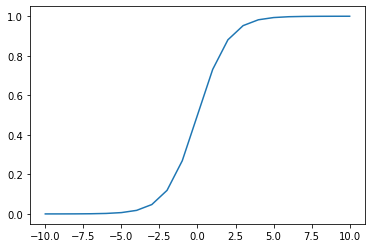

In [5]:
plt.plot(x,y)
plt.show()

In [7]:
from google.colab import files
adfile = files.upload()

Saving insurance (1).csv to insurance (1).csv


In [10]:
df = pd.read_csv("insurance (1).csv")

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [12]:
#data should be balanced
df['insuranceclaim'].value_counts()#imbalanced 1- 800 and  0- 200

1    783
0    555
Name: insuranceclaim, dtype: int64

In [13]:
x = df.drop('insuranceclaim',axis=1)
y = df['insuranceclaim']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (recall_score,accuracy_score,precision_score,roc_curve
                             ,roc_auc_score,confusion_matrix,f1_score)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)


In [20]:
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred =log.predict(x_test)

In [21]:
log.coef_

array([[-2.40409009e-02, -5.28756547e-02,  6.24319522e-02,
        -1.12862873e+00,  6.34850352e-02, -1.49369484e-01,
         9.68364584e-05]])

In [19]:
log.intercept_

array([-0.11835016])

In [22]:
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))

accuracy: 0.818407960199005
precision: 0.8086642599277978
recall: 0.9180327868852459
f1 score: 0.8598848368522072


In [24]:
(tn,fp),(fn,tp)=confusion_matrix(y_test,y_pred)

In [26]:
print(tp,fn,"\n",fp,tn)

224 20 
 53 105


In [30]:
fpr, tpr, thres=roc_curve(y_test,y_pred)

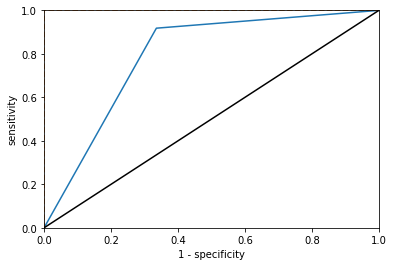

In [36]:
plt.plot(fpr,tpr)
plt.plot([0,0,1], [0,1,1],linestyle='--')
plt.plot([0,1],[0,1],'k-',label="imperfect")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show() 

In [38]:
roc_auc_score(y_test,y_pred)

0.7912948744552812

In [39]:
f1_score(y_test,y_hat)

0.8598848368522072

In [40]:
from sklearn.preprocessing import MinMaxScaler
for col in x:
  mm=MinMaxScaler()
  x[col]=mm.fit_transform(x[[col]])

In [41]:
x.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816


In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred =log.predict(x_test)
roc_auc_score(y_test,y_pred)

0.8753858737236485